In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCH = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name = dataset.class_names

In [5]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
68*32

2176

In [13]:
for image_bath,label_batch in dataset.take(1):
    print(image_bath.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 0, 2, 1, 1, 1, 0])>>


In [14]:
len([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 0, 2, 1, 1, 1, 0])

32

In [15]:
for image_bath,label_batch in dataset.take(1):
    print(image_bath[0].numpy())

[[[184. 188. 200.]
  [177. 181. 193.]
  [181. 185. 197.]
  ...
  [144. 147. 166.]
  [149. 152. 171.]
  [142. 145. 164.]]

 [[189. 193. 205.]
  [181. 185. 197.]
  [183. 187. 199.]
  ...
  [143. 146. 165.]
  [143. 146. 165.]
  [134. 137. 156.]]

 [[177. 181. 193.]
  [174. 178. 190.]
  [183. 187. 199.]
  ...
  [147. 150. 169.]
  [146. 149. 168.]
  [139. 142. 161.]]

 ...

 [[112. 114. 127.]
  [117. 119. 132.]
  [120. 122. 135.]
  ...
  [109. 106. 127.]
  [104. 101. 122.]
  [106. 103. 124.]]

 [[113. 115. 128.]
  [ 98. 100. 113.]
  [115. 117. 130.]
  ...
  [101.  98. 119.]
  [100.  97. 118.]
  [112. 109. 130.]]

 [[124. 126. 139.]
  [136. 138. 151.]
  [ 98. 100. 113.]
  ...
  [103. 100. 121.]
  [103. 100. 121.]
  [124. 121. 142.]]]


In [16]:
for image_bath,label_batch in dataset.take(1):
    print(image_bath[0].shape)

(256, 256, 3)


In [17]:
 #'Potato___Early_blight':0
# 'Potato___Late_blight':1
# 'Potato___healthy':2

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 2])>>
The len of batch is  32


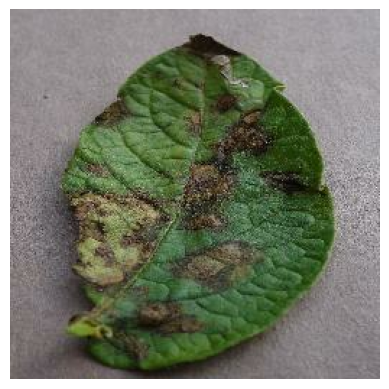

In [18]:
for image_bath,label_batch in dataset.take(1):
    plt.imshow(image_bath[0].numpy().astype("uint8"))
    print(label_batch.numpy)
    print("The len of batch is ",len(label_batch))
    plt.axis("off")

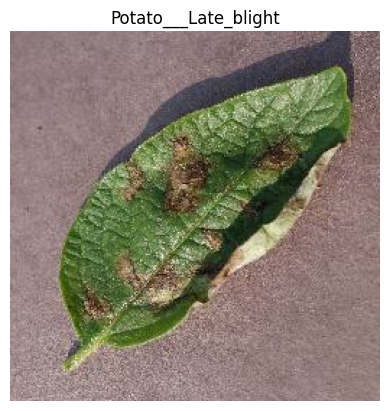

In [21]:
for image_bath,label_batch in dataset.take(1):
    plt.imshow(image_bath[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])
    plt.axis("off")

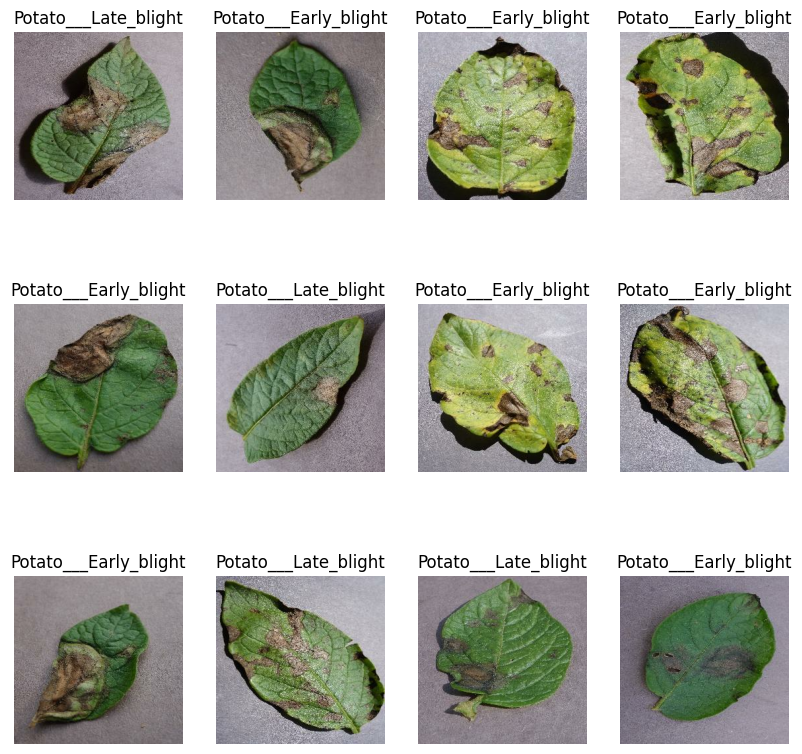

In [14]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_bath[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [15]:
len(dataset)

68

In [16]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [17]:
train_ds = dataset.take(54)
len(train_ds)

54

In [18]:
len(dataset.skip(54))

14

In [19]:
test_ds = dataset.skip(54)

In [20]:
val_size =0.1
len(dataset)*val_size

6.800000000000001

In [21]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [22]:
len(test_ds)

14

In [23]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [24]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size  =int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds ,test_ds
    

In [25]:
get_dataset_partitions_tf(dataset)

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [26]:
len(train_ds)

54

In [27]:
len(val_ds)

6

In [28]:
len(test_ds)

8

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =  test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
len(train_ds)

54

In [31]:
len(val_ds)

6

In [32]:
len(test_ds)

8

In [33]:
reszie_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [34]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [35]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    reszie_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [37]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [38]:
len(train_ds)

54

In [39]:
BATCH_SIZE

32

In [40]:
len(val_ds)

6

In [41]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 36s 642ms/step - loss: 0.8849 - accuracy: 0.5469 - val_loss: 0.8282 - val_accuracy: 0.6615
Epoch 2/50
54/54 [==============================] - 33s 614ms/step - loss: 0.6001 - accuracy: 0.7355 - val_loss: 0.5996 - val_accuracy: 0.7292
Epoch 3/50
54/54 [==============================] - 34s 621ms/step - loss: 0.3828 - accuracy: 0.8380 - val_loss: 0.5449 - val_accuracy: 0.7969
Epoch 4/50
54/54 [==============================] - 34s 621ms/step - loss: 0.3081 - accuracy: 0.8721 - val_loss: 0.3817 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 34s 622ms/step - loss: 0.2901 - accuracy: 0.8872 - val_loss: 0.2428 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 34s 634ms/step - loss: 0.2193 - accuracy: 0.9144 - val_loss: 0.3561 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 33s 619ms/step - loss: 0.2369 - accuracy: 0.9022 - val_loss: 0.2456 - val_accuracy: 0.8906

In [42]:
len(test_ds)

8

In [43]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 119ms/step - loss: 0.0182 - accuracy: 0.9957


In [44]:
history

In [45]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
len(history.history['accuracy'])

50

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

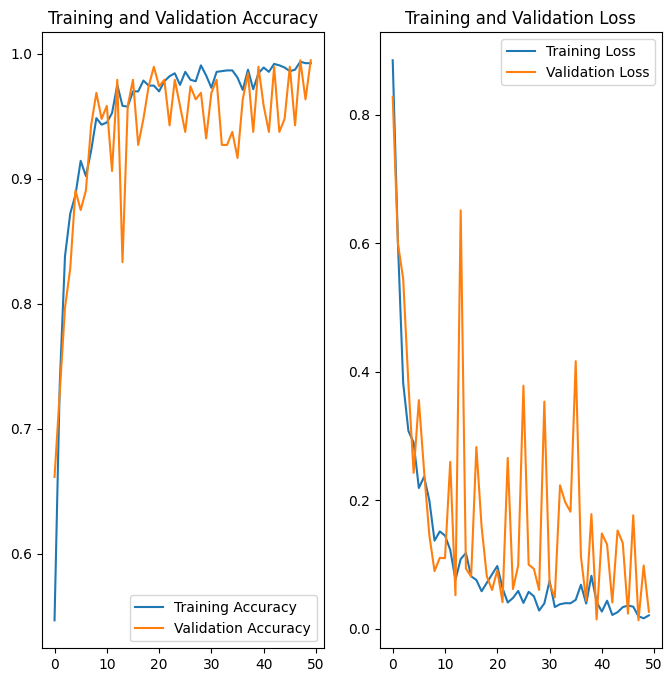

In [49]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label='Training Accuracy')
plt.plot(range(EPOCH),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCH), loss,label='Training Loss')
plt.plot(range(EPOCH), val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
 history.history['accuracy']

[0.6197916865348816,
 0.7332175970077515,
 0.7986111044883728,
 0.8339120149612427,
 0.8877314925193787,
 0.9131944179534912,
 0.9236111044883728,
 0.9004629850387573,
 0.9467592835426331,
 0.9479166865348816,
 0.9195601940155029,
 0.9594907164573669,
 0.9728009104728699,
 0.9641203880310059,
 0.9710648059844971,
 0.9780092835426331,
 0.9710648059844971,
 0.9814814925193787,
 0.9710648059844971,
 0.9849537014961243,
 0.984375,
 0.9774305820465088,
 0.9820601940155029,
 0.9820601940155029,
 0.9751157164573669,
 0.984375,
 0.9583333134651184,
 0.9704861044883728,
 0.9855324029922485,
 0.9918981194496155,
 0.9942129850387573,
 0.9959490895271301,
 0.9861111044883728,
 0.9809027910232544,
 0.9890046119689941,
 0.9924768805503845,
 0.9878472089767456,
 0.9895833134651184,
 0.9855324029922485,
 0.9890046119689941,
 0.9710648059844971,
 0.9438657164573669,
 0.9803240895271301,
 0.9918981194496155,
 0.9745370149612427,
 0.9855324029922485,
 0.9832175970077515,
 0.9890046119689941,
 0.989004611

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 236ms/step
predicted label: Potato___Late_blight


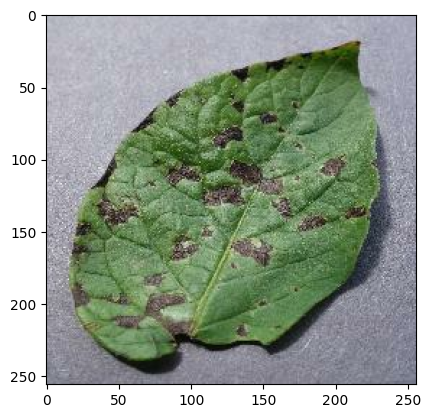

In [75]:
import numpy as np
for images_batch ,labels_batch in test_ds.take(1):
    first_image =  images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:" ,class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [65]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [89]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    prediction = model.predict(img_array)
    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class ,confidence

1/1 [==============================] - 0s 31ms/step


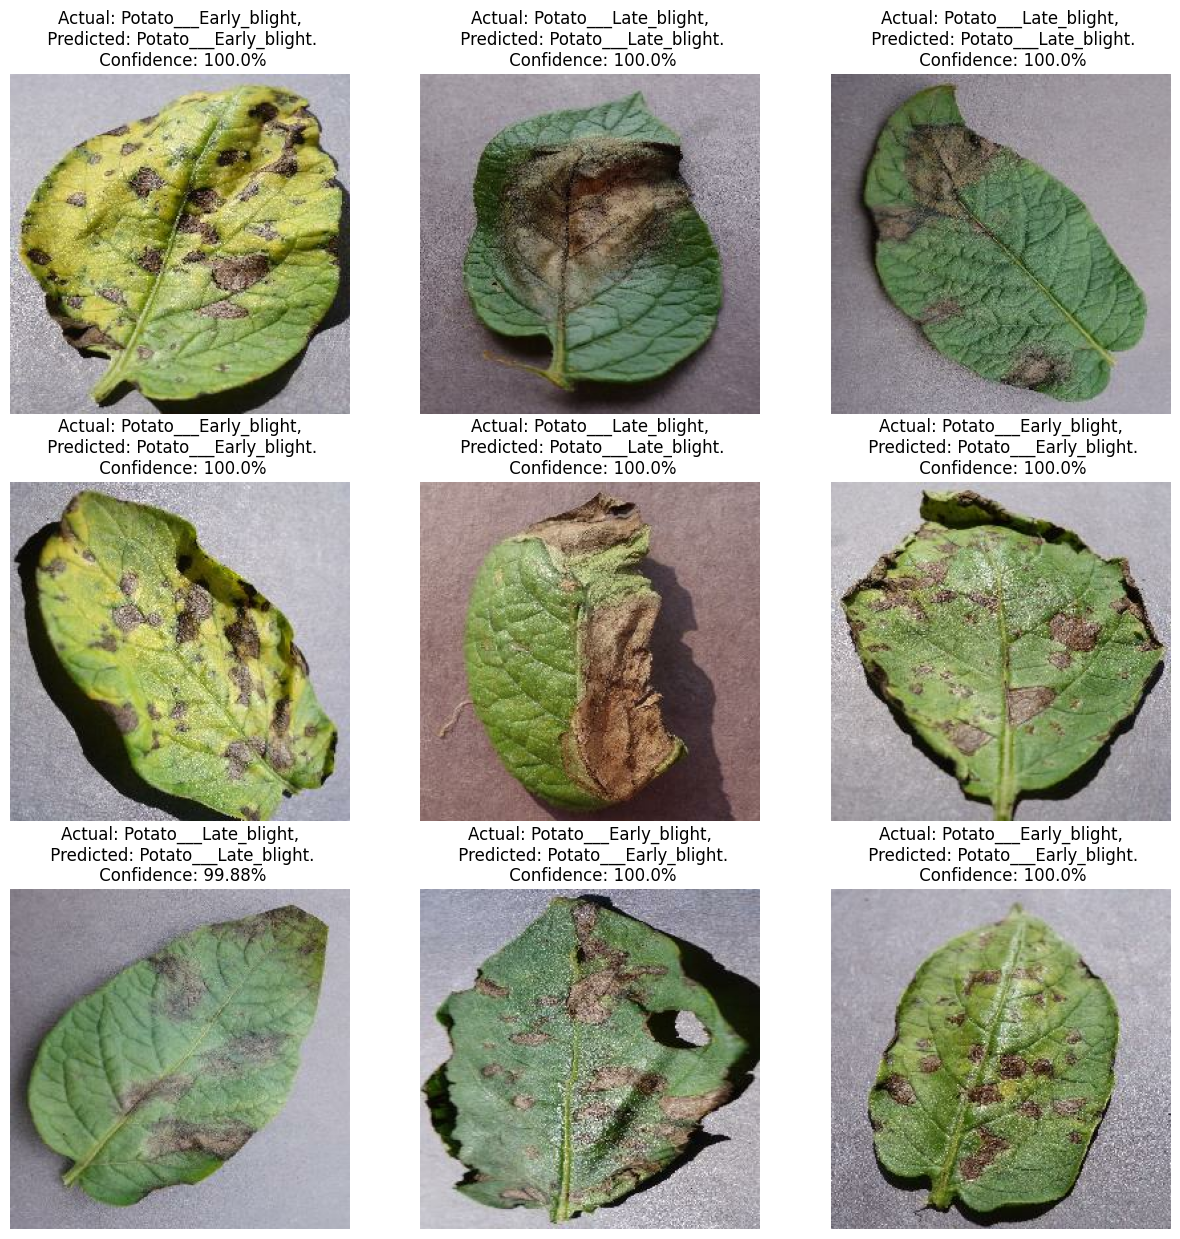

In [97]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [100]:
import os 
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
